In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
import re
import networkx as nx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

#https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-bigrams/
# reference : https://towardsdatascience.com/my-first-twitter-app-1115a327349e

In [19]:
import tweepy

# Variables that contains the credentials to access Twitter API
ACCESS_TOKEN = ''
ACCESS_SECRET = ''
CONSUMER_KEY = ''
CONSUMER_SECRET = ''


# Setup access to API
def connect_to_twitter_OAuth():
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    api = tweepy.API(auth)
    return api


# Create API ob ject
api = connect_to_twitter_OAuth() 

## Test API

In [20]:
api = tweepy.API(auth)
for tweet in tweepy.Cursor(api.search, q='COVID').items(10):
    print(tweet.text)

RT @AfricaFactsZone: Rwanda's national carrier, RwandAir will become Africa's first airline to use the International Air Transport Associat…
@_FriedrichMerz Das Corona Virus wird niemals verschwinden und uns begleiten wie die Grippe Vieren (zu denen auch d… https://t.co/kcVNj1fe1S
RT @POTUS: The week before I took office, 6 million COVID-19 vaccine shots were administered.

This coming week, our Administration will li…
RT @ReutersAfrica: Ivory Coast received a shipment of COVID-19 doses from the COVAX vaccine-sharing facility on Friday, becoming the second…
La volontaria è cinese-americana, il paziente afroamericano, nell’ambulatorio #lighthouseguild dove sono appena sta… https://t.co/uNQ2Ir9pRQ
RT @jadennecabahug: If you are a non-Asian person that enjoys Asian things like kpop, anime, asian cuisine, etc; please don't ignore the ri…
RT @Ticha_221: 1 minuto de silêncio para a vida universitária que o covid estragou :')
RT @zaranosaur: “Do you have COVID fatigue?” “no I have everybody t

In [26]:
chr_tweets = api.user_timeline('chravens')
for tweet in chr_tweets:
    print(tweet.text)

RT @JohnCleese: Don't mention the mittens!!! https://t.co/LBDhZkXm9j
@JohnCleese @FAWLTYTOWERS_ @BernieSanders Looks like Bernie doesn't like duck.
RT @David_Leavitt: Twitter has locked @realDonaldTrump's account for 12 hours.

Retweet if that's not enough and @TwitterSafety should DELE…
RT @NOAASatellitePA: NEW: As numerous #wildfires rage across California, @NOAA's #GOES17🛰️ caught this time-lapse of the #lightning between…
RT @NOAASatellitePA: UPDATE: Yesterday evening @NOAA's #GOES17 watched as smoke continued to billow from the #CaliforniaWildfires. Many of…
RT @M_McDonough: All Employees U.S. Postal https://t.co/8Rvx3VLJ1e
RT @TheEconomist: The electoral college splits voting power unevenly across states and discourages voting in uncompetitive states https://t…
Keep up with the latest coronavirus research https://t.co/AoXAtFPUyx
RT @MikeBloomberg: Bernie is a talker. I’m a doer.

In 30 years in Congress, he has written three bills that became law.

In 12 years as ma…
@edyong209 A

In [25]:
mike_tweets = api.user_timeline('M_McDonough')
for tweet in mike_tweets:
    print(tweet.text)

U.S. Yield Curve: https://t.co/a4tiFb0yxl
RT @carlquintanilla: DALLAS (AP) -- Texas Sen. Ted Cruz has traveled to Mexico for a family vacation as his home state struggles with a wea…
U.S. Initial Jobless Claims: https://t.co/p5fA52dvSN
U.S. Retail Sales significantly exceeded expectations in January, but the effect could be temporary on the back of… https://t.co/8XWkkokvZH
U.S. Yield Curve: https://t.co/17c1H0DThl
Daily Texas Electricity Demand (Seasonal Chart) https://t.co/Na1g1RRXpW
He knows he voted not guilty, right?
History won’t look back kindly on today.
Change in Fed Treasury Holdings (post-2008 and during the pandemic): {@TheTerminal chart link:… https://t.co/rMXPgIdS4Y
Looks like something happened in November?
UMich Consumer Confidence by Political Party: https://t.co/aTG4Xj3Nxk
RT @Patriots: Congratulations to the greatest of all time.
My detailed NFP monitor: https://t.co/cemzmUgRoe
Approval Ratings: Congress, Trump and Biden https://t.co/wY3bBOxIxj
Congressional Job Appro

In [31]:
mike_df  = pd.DataFrame(mike_tweets)

,0
0,Status(_api=<tweepy.api.API object at 0x7fbc28...
1,Status(_api=<tweepy.api.API object at 0x7fbc28...
2,Status(_api=<tweepy.api.API object at 0x7fbc28...
3,Status(_api=<tweepy.api.API object at 0x7fbc28...
4,Status(_api=<tweepy.api.API object at 0x7fbc28...


    Search term -  #wildfires
    the start date of your search

In [35]:
search_words = "#wildfires"
date_since = "2020-01-01"

In [ ]:
#  use .Cursor() to search twitter for tweets containing the 
#search term #wildfires. 
#Restrict the number of tweets returned by 
#specifying a number in the .items() method. .items(5) will return 5 of the most 
#recent tweets.

In [36]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(5)
tweets



.Cursor() returns an object that you can iterate or loop over to access the data collected. Each item in the iterator has various attributes that you can access to get information about each tweet including:

    the text of the tweet
    who sent the tweet
    the date the tweet was sent

and more. The code below loops through the object and prints the text associated with each tweet.

In [38]:
#Collect tweets
tweets = tw.Cursor(api.search, q = search_words, lang="en", since=date_since).items(10)
for tweet in tweets:
    print(tweet.text)

RT @GlobalGovForum: The scientific community has long warned us about an increase in environmentally induced disasters such as flooding and…
RT @aidashinc: #DidYouKnow #utilities are legally bound to keep #powerlines away from #Vegetation which may lead to #Wildfires? #FridayFact…
#DidYouKnow #utilities are legally bound to keep #powerlines away from #Vegetation which may lead to #Wildfires?… https://t.co/Ch8DokvXZe
From the Amazon to Siberia, experts discussed the causes and outlooks of the world’s #wildfires on this #GLFLive se… https://t.co/VNRrNpTj8X
RT @USGS: Post-wildfire landslides becoming more frequent in Southern California https://t.co/UShdPg0FTp #naturalhazards #California #lands…
@b00sk0r @Sam_Lilleker @Britnatureguide @ARGroupsUK @ARC_Bytes @AddersAmazing @BritishHerpSoc @ynuorg @DerbysARG We… https://t.co/gqsMqPViS2
Wildfires have a catastrophic impact, destroying nature's carbon sinks, emitting billions of tonnes of CO2. What if… https://t.co/SfOhHBP2df
RT @SierraClubBC

In [ ]:
## Instead of the standard for loop above
# Do the same with list comprehension 

In [39]:
# Collect tweets
tweets = tw.Cursor(api.search,
                       q=search_words,
                       lang="en",
                       since=date_since).items(5)

# Collect a list of tweets
[tweet.text for tweet in tweets]

['New USGS Strategy Harnesses State-of-the-Art Science to Tackle Wildfires Before, During and After the Flames @USGS… https://t.co/M7zkDZUlMT',
 'RT @GlobalGovForum: The scientific community has long warned us about an increase in environmentally induced disasters such as flooding and…',
 'RT @aidashinc: #DidYouKnow #utilities are legally bound to keep #powerlines away from #Vegetation which may lead to #Wildfires? #FridayFact…',
 '#DidYouKnow #utilities are legally bound to keep #powerlines away from #Vegetation which may lead to #Wildfires?… https://t.co/Ch8DokvXZe',
 'From the Amazon to Siberia, experts discussed the causes and outlooks of the world’s #wildfires on this #GLFLive se… https://t.co/VNRrNpTj8X']

Don't include retweets

In [41]:
new_search = search_words + " -filter:retweets"
new_search



'#wildfires -filter:retweets'

In [42]:
tweets = tw.Cursor(api.search,
                       q=new_search,
                       lang="en",
                       since=date_since).items(5)

[tweet.text for tweet in tweets]


['Advances in Satellite Data for Wildfire Smoke Forecasting #SatelliteData #Wildfires #SmokeForecasting\nhttps://t.co/yVBefCj2Ya',
 'New USGS Strategy Harnesses State-of-the-Art Science to Tackle Wildfires Before, During and After the Flames @USGS… https://t.co/M7zkDZUlMT',
 '#DidYouKnow #utilities are legally bound to keep #powerlines away from #Vegetation which may lead to #Wildfires?… https://t.co/Ch8DokvXZe',
 'From the Amazon to Siberia, experts discussed the causes and outlooks of the world’s #wildfires on this #GLFLive se… https://t.co/VNRrNpTj8X',
 '@b00sk0r @Sam_Lilleker @Britnatureguide @ARGroupsUK @ARC_Bytes @AddersAmazing @BritishHerpSoc @ynuorg @DerbysARG We… https://t.co/gqsMqPViS2']

Who is Tweeting About Wildfires?
    tweet.user.screen_name provides the user’s twitter handle associated with each tweet.
    tweet.user.location provides the user’s provided location 
        (Manually entered into Twitter by the user)

You can experiment with other items available within each tweet by typing tweet. and using the tab button to see all of the available attributes stored.

In [43]:
tweets = tw.Cursor(api.search, 
                           q=new_search,
                           lang="en",
                           since=date_since).items(5)

users_locs = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets]
users_locs


[['HySpeedGeo', ''],
 ['HySpeedGeo', ''],
 ['aidashinc', 'San Jose, CA, USA '],
 ['GlobalLF', 'Bonn, Germany'],
 ['4peatssake2', 'Yorkshire & HHLs']]

In [ ]:
## Create a Pandas DataFrame From a List of Tweet Data


In [46]:
tweet_text = pd.DataFrame(data=users_locs, 
                    columns=['user', "location"])
tweet_text


,user,location
0,HySpeedGeo,
1,HySpeedGeo,
2,aidashinc,"San Jose, CA, USA"
3,GlobalLF,"Bonn, Germany"
4,4peatssake2,Yorkshire & HHLs


In [50]:
# fuction to extract data from tweet object
def extract_tweet_attributes(tweet_object):
    # create empty list
    tweet_list =[]
    # loop through tweet objects
    for tweet in tweet_object:
        tweet_id = tweet.id # unique integer identifier for tweet
        text = tweet.text # utf-8 text of tweet
        favorite_count = tweet.favorite_count
        retweet_count = tweet.retweet_count
        created_at = tweet.created_at # utc time tweet created
        source = tweet.source # utility used to post tweet
        reply_to_status = tweet.in_reply_to_status_id # if reply int of orginal tweet id
        reply_to_user = tweet.in_reply_to_screen_name # if reply original tweetes screenname
        retweets = tweet.retweet_count # number of times this tweet retweeted
        favorites = tweet.favorite_count # number of time this tweet liked
        # append attributes to list
        tweet_list.append({'tweet_id':tweet_id, 
                          'text':text, 
                          'favorite_count':favorite_count,
                          'retweet_count':retweet_count,
                          'created_at':created_at, 
                          'source':source, 
                          'reply_to_status':reply_to_status, 
                          'reply_to_user':reply_to_user,
                          'retweets':retweets,
                          'favorites':favorites})
    # create dataframe   
    df = pd.DataFrame(tweet_list, columns=['tweet_id',
                                           'text',
                                           'favorite_count',
                                           'retweet_count',
                                           'created_at',
                                           'source',
                                           'reply_to_status',
                                           'reply_to_user',
                                           'retweets',
                                           'favorites'])
    return df


df = extract_tweet_attributes(mike_tweets)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   tweet_id         20 non-null     int64         
 1   text             20 non-null     object        
 2   favorite_count   20 non-null     int64         
 3   retweet_count    20 non-null     int64         
 4   created_at       20 non-null     datetime64[ns]
 5   source           20 non-null     object        
 6   reply_to_status  2 non-null      float64       
 7   reply_to_user    2 non-null      object        
 8   retweets         20 non-null     int64         
 9   favorites        20 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 1.7+ KB


In [ ]:
# So above was by user -- 
# Can we get a users followers?
# How about a users 

In [54]:
new_search = "climate+change -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=new_search,
                   lang="en",
                   since='2018-04-23').items(1000)

all_tweets = [tweet.text for tweet in tweets]
all_tweets[:5]



['"Penn State climate scientist @MichaelEMann  agrees. The circulation is weakening “well ahead of schedule,” said Ma… https://t.co/8T3fuZgYui',
 "@life2squared @SunPower People are going to go bullish and bearish on an emotional issue like climate change. I've… https://t.co/BHDtViveZN",
 "Itochu and France's Air Liquide to build giant hydrogen plant to accerlerate its adoption in Japan… https://t.co/dZLmKvmjfb",
 "@Intellekt37 @acidentalheaven @WatchChad @RealMattCouch There's no point. These people don't believe in anything re… https://t.co/N9AcRJABLS",
 '#T20Italy\n\nregardless the pandemic, we will still have to face the consequences of climate change on the world econ… https://t.co/QO5XqcmyhO']

In [57]:
import re

def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())


#define function to remove url from tweets
#after defining create a list of clean tweets

In [58]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]


['Penn State climate scientist MichaelEMann agrees The circulation is weakening well ahead of schedule said Ma',
 'life2squared SunPower People are going to go bullish and bearish on an emotional issue like climate change Ive',
 'Itochu and Frances Air Liquide to build giant hydrogen plant to accerlerate its adoption in Japan',
 'Intellekt37 acidentalheaven WatchChad RealMattCouch Theres no point These people dont believe in anything re',
 'T20Italyregardless the pandemic we will still have to face the consequences of climate change on the world econ']

In [62]:
# Split the words from one tweet into unique elements
all_tweets_no_urls[0].lower().split()



['penn',
 'state',
 'climate',
 'scientist',
 'michaelemann',
 'agrees',
 'the',
 'circulation',
 'is',
 'weakening',
 'well',
 'ahead',
 'of',
 'schedule',
 'said',
 'ma']

In [63]:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['penn',
  'state',
  'climate',
  'scientist',
  'michaelemann',
  'agrees',
  'the',
  'circulation',
  'is',
  'weakening',
  'well',
  'ahead',
  'of',
  'schedule',
  'said',
  'ma'],
 ['life2squared',
  'sunpower',
  'people',
  'are',
  'going',
  'to',
  'go',
  'bullish',
  'and',
  'bearish',
  'on',
  'an',
  'emotional',
  'issue',
  'like',
  'climate',
  'change',
  'ive']]

In [68]:
import itertools
import collections
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)


[('the', 670),
 ('climate', 623),
 ('change', 545),
 ('to', 480),
 ('of', 311),
 ('and', 309),
 ('is', 292),
 ('a', 287),
 ('in', 213),
 ('on', 172),
 ('for', 155),
 ('that', 134),
 ('are', 125),
 ('we', 114),
 ('i', 110)]

In [69]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()


,words,count
0,the,670
1,climate,623
2,change,545
3,to,480
4,of,311


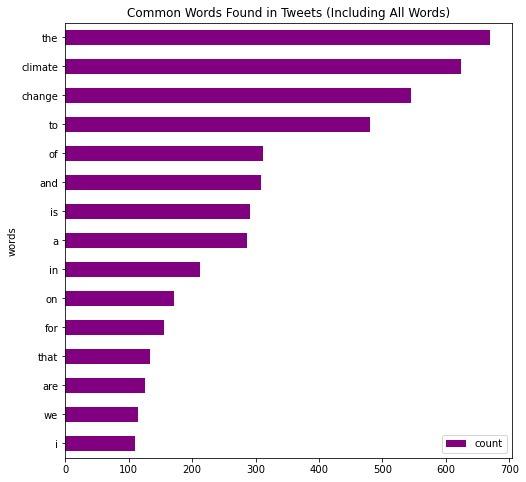

In [70]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()


In [81]:
import nltk as nltk

In [84]:
nltk.download('stopwords') 
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/catherineravenscroft/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [85]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]


['doing', 'what', 'after', 'will', 'that', 'few', 'we', 'about', 'me', 'down']

In [86]:
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

['penn',
 'state',
 'climate',
 'scientist',
 'michaelemann',
 'agrees',
 'circulation',
 'weakening',
 'well',
 'ahead',
 'schedule',
 'said']

In [87]:
#flatten list and create a counter to return the 
#most commonly used words and the number of times that they are used.

all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)






[('climate', 623),
 ('change', 545),
 ('new', 44),
 ('people', 42),
 ('us', 39),
 ('like', 37),
 ('dont', 35),
 ('amp', 34),
 ('global', 34),
 ('world', 33),
 ('think', 32),
 ('would', 31),
 ('emissions', 29),
 ('science', 28),
 ('could', 28)]

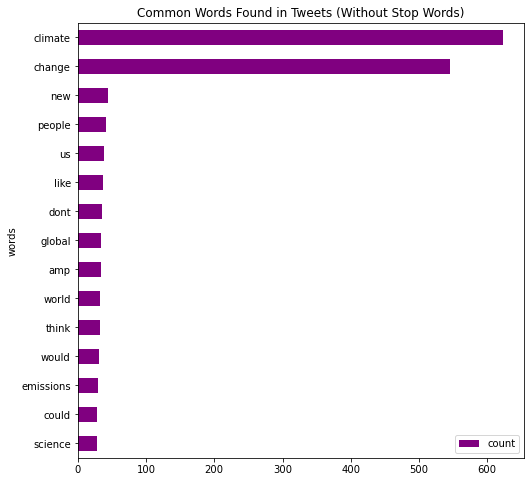

In [88]:
#Create pd Dataframe and plot the word frequencies without the stop words.
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()




In [89]:
## Remove collection words 
collection_words = ['climatechange', 'climate', 'change']


In [90]:
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                for word in tweets_nsw]

In [91]:
tweets_nsw[0]

['penn',
 'state',
 'climate',
 'scientist',
 'michaelemann',
 'agrees',
 'circulation',
 'weakening',
 'well',
 'ahead',
 'schedule',
 'said']

In [93]:
tweets_nsw_nc[1]

['life2squared',
 'sunpower',
 'people',
 'going',
 'go',
 'bullish',
 'bearish',
 'emotional',
 'issue',
 'like',
 'ive']

In [98]:

# Plot the final word frequency results 
#- flatten the list and creat counter for words in tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)



[('new', 44),
 ('people', 42),
 ('us', 39),
 ('like', 37),
 ('dont', 35),
 ('amp', 34),
 ('global', 34),
 ('world', 33),
 ('think', 32),
 ('would', 31),
 ('emissions', 29),
 ('science', 28),
 ('could', 28),
 ('fight', 27),
 ('via', 27)]

In [99]:
len(counts_nsw_nc)

4462

In [100]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw.head()
# plot the top 1 most common words and their 

,words,count
0,new,44
1,people,42
2,us,39
3,like,37
4,dont,35


#### 1. Bigrams (co-occurring words) in Tweets
#### 2. Create networks from words in Tweets

In [104]:
# Creat list of lists containing bigrams in tweets

terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]

In [103]:
terms_bigram[0]

[('penn', 'state'),
 ('state', 'scientist'),
 ('scientist', 'michaelemann'),
 ('michaelemann', 'agrees'),
 ('agrees', 'circulation'),
 ('circulation', 'weakening'),
 ('weakening', 'well'),
 ('well', 'ahead'),
 ('ahead', 'schedule'),
 ('schedule', 'said')]

In [107]:
tweets_nsw_nc[0]

['penn',
 'state',
 'scientist',
 'michaelemann',
 'agrees',
 'circulation',
 'weakening',
 'well',
 'ahead',
 'schedule',
 'said']

In [108]:
# Count the occurence of bigrams in the list of 100 tweets 

# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)




[(('united', 'nations'), 18),
 (('nations', 'countries'), 17),
 (('pledges', 'cut'), 17),
 (('countries', 'pledges'), 16),
 (('cut', 'emissions'), 16),
 (('emissions', 'far'), 16),
 (('far', 'meager'), 16),
 (('meager', 'halt'), 16),
 (('war', 'smoking'), 15),
 (('smoking', 'gun'), 15),
 (('gun', 'vice'), 15),
 (('vice', 'versa'), 15),
 (('gulf', 'stream'), 12),
 (('seen', 'new'), 9),
 (('new', 'proposal'), 9),
 (('proposal', 'could'), 9),
 (('could', 'tie'), 9),
 (('tie', 'debt'), 9),
 (('debt', 'repayments'), 9),
 (('repayments', 'nature'), 9)]

In [109]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20), columns=['bigram', 'count'])
bigram_df

,bigram,count
0,"(united, nations)",18
1,"(nations, countries)",17
2,"(pledges, cut)",17
3,"(countries, pledges)",16
4,"(cut, emissions)",16
5,"(emissions, far)",16
6,"(far, meager)",16
7,"(meager, halt)",16
8,"(war, smoking)",15
9,"(smoking, gun)",15


In [110]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
d

[{('united', 'nations'): 18,
  ('nations', 'countries'): 17,
  ('pledges', 'cut'): 17,
  ('countries', 'pledges'): 16,
  ('cut', 'emissions'): 16,
  ('emissions', 'far'): 16,
  ('far', 'meager'): 16,
  ('meager', 'halt'): 16,
  ('war', 'smoking'): 15,
  ('smoking', 'gun'): 15,
  ('gun', 'vice'): 15,
  ('vice', 'versa'): 15,
  ('gulf', 'stream'): 12,
  ('seen', 'new'): 9,
  ('new', 'proposal'): 9,
  ('proposal', 'could'): 9,
  ('could', 'tie'): 9,
  ('tie', 'debt'): 9,
  ('debt', 'repayments'): 9,
  ('repayments', 'nature'): 9}]

In [111]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("china", weight=100)


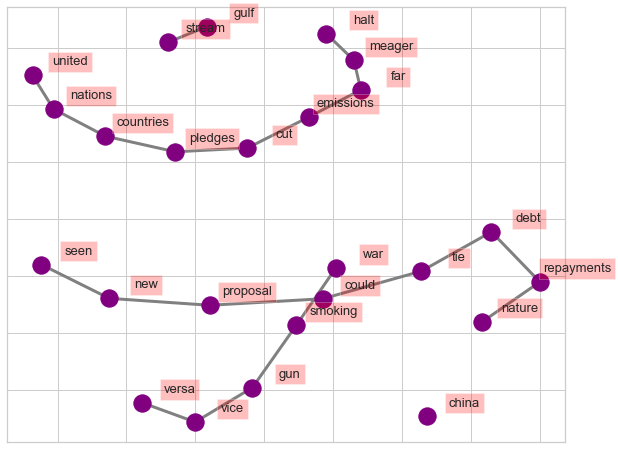

In [112]:
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()


#This plot displays the networks of co-occurring words in tweets on climate change 

## Sentiment Analysis 

In [117]:
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [120]:
# Create a custom search term and define the number of tweets
search_term = "#climate+change -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]


In [ ]:
#Python package textblob to calculate the polarity values of 
#individual tweets on climate change.

#Begin by creating textblob objects, which assign polarity values 
#to the tweets.
#identify the polarity value using the attribute .polarity of texblob object.

In [123]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]



[0.0,
 'Once again Australia is named as a country which has made no substantial contribution to meeting climate change']

In [124]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()


,polarity,tweet
0,0.000000,Once again Australia is named as a country whi...
1,0.000000,LeChatNoire4 wmnfnews mexmarks Combo of climat...
2,0.175000,The King Climate Action Initiative of JPAL ann...
3,0.000000,The Arctics rapid decline in seal populations ...
4,0.253333,PlanetarySec AlexVerbeek GenevaSolutions Very ...


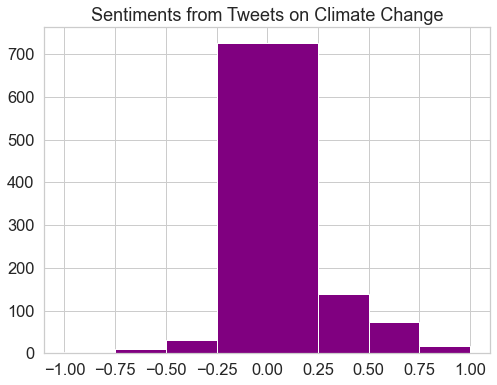

In [125]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Climate Change")
plt.show()


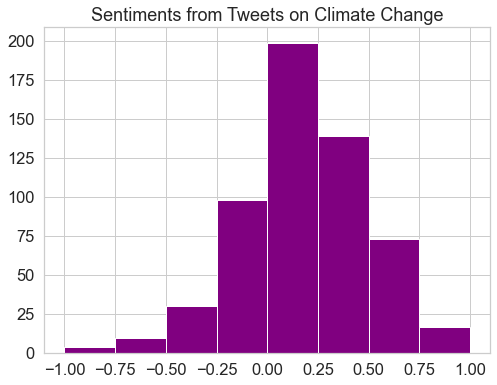

In [126]:
#To get a better visual of the polarit values, 
#remove the polarity values equal to zero and 
#create a break in the histogram at zero.

# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]

fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Climate Change")
plt.show()





In [ ]:
### THE 2018 WildFire in California

In [128]:
search_term = "#WildFire -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-09-23').items(1000)

# Remove URLs and create textblob object for each tweet
all_tweets_no_urls = [TextBlob(remove_url(tweet.text)) for tweet in tweets]

all_tweets_no_urls[:5]


[TextBlob("Community efforts to become more wildfire ready are exemplary but local residents shouldnt be the only ones lea"),
 TextBlob("Best idea yet as theyve proven over and over they cant be trusted California proposes enhanced oversight of"),
 TextBlob("Spring2021 is not too far out With spring cleaning in mind a timely report from KTVN on preparing for"),
 TextBlob("jonkershoek fire banhoek stellenbosch somersetwest wildfire westerncape All the best to the fire fighters"),
 TextBlob("This figure highlights the number of acres burned per wildfire as well as structured damaged per acre burned since")]

In [129]:
# Calculate polarity of tweets
wild_sent_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in all_tweets_no_urls]

# Create dataframe containing polarity values and tweet text
wild_sent_df = pd.DataFrame(wild_sent_values, columns=["polarity", "tweet"])
wild_sent_df = wild_sent_df[wild_sent_df.polarity != 0]

wild_sent_df.head()


,polarity,tweet
0,0.175,Community efforts to become more wildfire read...
1,1.000,Best idea yet as theyve proven over and over t...
2,0.100,Spring2021 is not too far out With spring clea...
3,1.000,jonkershoek fire banhoek stellenbosch somerset...
6,0.208,Wildfire fuel modification programs by LagunaB...


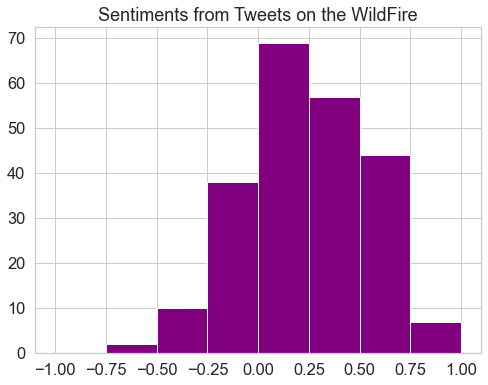

In [130]:
fig, ax = plt.subplots(figsize=(8, 6))

wild_sent_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],
        ax=ax, color="purple")

plt.title("Sentiments from Tweets on the WildFire")
plt.show()
